# Practice

# Descriptive Analysis using Python
## University Score Analysis

In [1]:
import pandas as pd
import seaborn as sb
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm,kurtosis

In [2]:
df=pd.read_csv('DS1_C5_S1_Students_Scores_Data_Practice.csv')
df

,Name,Statistics,Python,Tableau
0,David,62,89,56
1,James,47,87,86
2,Robert,55,67,77
3,Thomas,74,55,45
4,Steven,31,47,73
5,Paul,77,72,62
6,Gary,85,76,74
7,Justin,63,79,89
8,Patrick,42,44,67
9,Tyler,32,99,67


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        12 non-null     object
 1   Statistics  12 non-null     int64 
 2   Python      12 non-null     int64 
 3   Tableau     12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


In [4]:
df.describe()

,Statistics,Python,Tableau
count,12.000000,12.000000,12.000000
mean,58.500000,73.583333,71.750000
std,17.500649,18.436418,14.429295
min,31.000000,44.000000,45.000000
25%,45.750000,64.000000,65.750000
50%,62.500000,74.000000,70.500000
75%,71.750000,87.500000,79.250000
max,85.000000,99.000000,97.000000


In [5]:
df.shape

(12, 4)

In [6]:
df.size

48

In [7]:
df.isnull().sum()

Name          0
Statistics    0
Python        0
Tableau       0
dtype: int64

In [8]:
cat_df=df.select_dtypes(include='object')
num_df=df.select_dtypes(exclude='object')

In [9]:
#1
mean=[]
median=[]
mode=[]
for col in num_df.columns:
    mean.append(st.mean(num_df[col]))
    median.append(st.median(num_df[col]))
    mode.append(st.mode(num_df[col]))

In [10]:
mean,median,mode

([58.5, 73.58333333333333, 71.75], [62.5, 74.0, 70.5], [63, 99, 67])

In [11]:
row_head=['Mean','Median','Mode']
col_head=num_df.columns.tolist()

ct_df=pd.DataFrame([mean,median,mode],index=row_head,columns=col_head)
ct_df

,Statistics,Python,Tableau
Mean,58.5,73.583333,71.75
Median,62.5,74.000000,70.50
Mode,63.0,99.000000,67.00


In [12]:
#2
sd=[]
cv=[]
for col in num_df.columns:
    sd.append(st.stdev(num_df[col]))
    cv.append((st.stdev(num_df[col])/st.mean(num_df[col]))*100)

In [13]:
sd,cv

([17.500649338602475, 18.436418175760583, 14.429294697057976],
 [29.915639895046965, 25.055154938745982, 20.11051525722366])

In [14]:
row_head=['Standard Deviation','Coefficient of Variants']
col_head=num_df.columns.tolist()

ct_df=pd.DataFrame([sd,cv],index=row_head,columns=col_head)
ct_df

,Statistics,Python,Tableau
Standard Deviation,17.500649,18.436418,14.429295
Coefficient of Variants,29.915640,25.055155,20.110515


In [15]:
#3
for col in num_df.columns:
    LO=[] #Lower outliers
    UO=[] #Upper outliers
    
    ser=pd.Series(num_df[col])
    
    min=ser.min()
    max=ser.max()
    
    q1=ser.quantile(0.25)
    q3=ser.quantile(0.75)
    
    iqr=q3-q1
    
    UF=q3+(1.5*iqr) #Upper Fence
    LF=q1-(1.5*iqr) #Lower Fence
    
    for val in ser:
        if val>UF:
            UO.append(val)
        elif val<LF:
            LO.append(val)
    
    if col=='Statistics':
        Statistics=['Statistics',min,max,q1,q3,iqr,UF,LF,UO,LO]
    elif col=='Python':
        Python=['Python',min,max,q1,q3,iqr,UF,LF,UO,LO]
    elif col=='Tableau':
        Tableau=['Tableau',min,max,q1,q3,iqr,UF,LF,UO,LO]

col_head=['Company Name','Min','Max','Q1','Q3','IQR','UF','LF','UO','LO']
range_df=pd.DataFrame([Statistics,Python,Tableau],columns=col_head)
range_df

,Company Name,Min,Max,Q1,Q3,IQR,UF,LF,UO,LO
0,Statistics,31,85,45.75,71.75,26.0,110.75,6.75,[],[]
1,Python,44,99,64.00,87.50,23.5,122.75,28.75,[],[]
2,Tableau,45,97,65.75,79.25,13.5,99.50,45.50,[],[45]


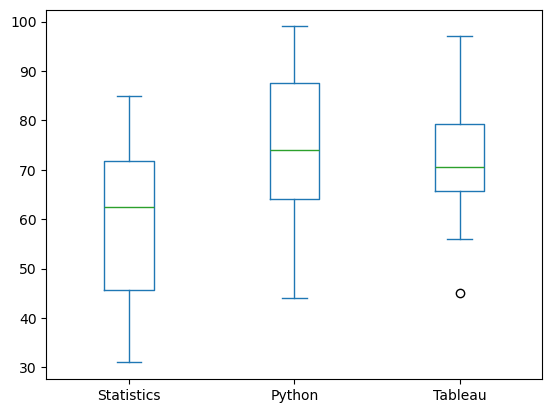

In [16]:
num_df[['Statistics', 'Python', 'Tableau']].plot.box()
plt.show()

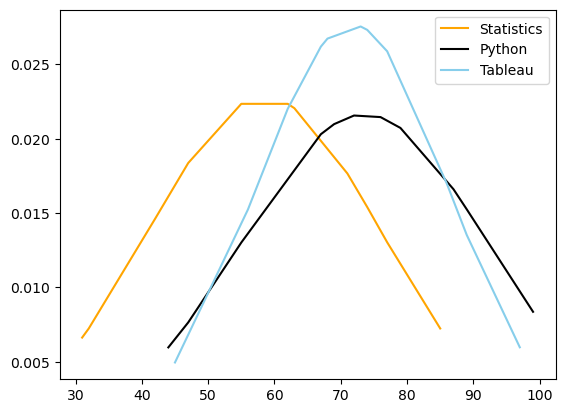

In [17]:
#4
statistics_data = sorted(df['Statistics'])
python_data = sorted(df['Python'])
tableau_data = sorted(df['Tableau'])

s_mean=st.mean(statistics_data)
s_std=st.stdev(statistics_data)

p_mean=st.mean(python_data)
p_std=st.stdev(python_data)

t_mean=st.mean(tableau_data)
t_std=st.stdev(tableau_data)

plt.plot(statistics_data,norm.pdf(statistics_data,s_mean,s_std),color='orange',label='Statistics')
plt.plot(python_data,norm.pdf(python_data,p_mean,p_std),color='black',label='Python')
plt.plot(tableau_data,norm.pdf(tableau_data,t_mean,t_std),color='skyblue',label='Tableau')

plt.legend()
plt.show()

In [18]:
#5
print('Kurtosis of Statistics Mark is',kurtosis(statistics_data))
print('Kurtosis of Python Mark is',kurtosis(python_data))
print('Kurtosis of Tableau Marks is',kurtosis(tableau_data))

Kurtosis of Statistics Mark is -1.0438440476747421
Kurtosis of Python Mark is -1.0159472252820538
Kurtosis of Tableau Marks is -0.4356912494591376


## Conclusion
## From the University Score Analysis
#### All Learners were well Performed in Python concept
#### They Scored average of 73.5 percent compared to Statistics and Tableau
#### All the Technologies Kurtosis were in negative
#### So we can conclude that all are Platykurtic

# Challenge

# Descriptive Analysis using Python
## Vehicle Performance Analysis

In [19]:
df1=pd.read_excel('DS1_C5_S1_Car_Data_Challenge.xlsx')
df1

,Sl. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 139 entries, Sl. No. to Electric_Range
dtypes: float64(15), int64(1), object(123)
memory usage: 1.4+ MB


In [21]:
df1.describe()

,Sl. No.,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Height_mm,Length_mm,Width_mm,Doors,City_Mileage_km_litre,Highway_Mileage_km_litre,Seating_Capacity,Boot_Space_litre,Minimum_Turning_Radius,Number_of_Airbags,USB_Ports
count,1276.000000,1264.000000,1210.000000,1174.000000,1207.000000,1275.000000,1276.000000,1264.000000,1272.000000,721.000000,476.000000,1270.000000,1027.000000,895.000000,1141.000000,29.000000
mean,637.500000,1858.804589,4.380992,3.977853,52.119221,1592.539608,4296.883730,1788.550506,4.550314,15.815381,16.879706,5.270079,373.319377,5.605687,3.787029,1.793103
std,368.493781,1063.152389,1.660957,0.833763,16.458956,151.669218,476.612977,150.932432,0.747816,8.954285,4.918816,1.145231,143.438691,1.528075,2.522399,0.773642
min,0.000000,72.000000,2.000000,1.000000,15.000000,1136.000000,4.640000,1.840000,2.000000,2.000000,4.000000,2.000000,20.000000,3.500000,1.000000,1.000000
25%,318.750000,1198.000000,4.000000,4.000000,40.000000,1495.000000,3991.750000,1695.000000,4.000000,11.500000,13.800000,5.000000,259.000000,4.970000,2.000000,1.000000
50%,637.500000,1497.000000,4.000000,4.000000,46.000000,1557.000000,4331.000000,1770.000000,5.000000,15.290000,17.190000,5.000000,360.000000,5.250000,2.000000,2.000000
75%,956.250000,1998.000000,4.000000,4.000000,60.000000,1666.000000,4620.000000,1852.500000,5.000000,19.200000,20.500000,5.000000,475.000000,5.600000,6.000000,2.000000
max,1275.000000,7993.000000,16.000000,16.000000,105.000000,2670.000000,6092.000000,2226.000000,5.000000,110.000000,25.600000,16.000000,981.000000,13.500000,14.000000,3.000000


In [22]:
df1.shape

(1276, 139)

In [23]:
df1.size

177364

In [24]:
df1.isnull().sum()

Sl. No.                0
Make                  75
Model                  0
Variant                0
Displacement          12
                    ... 
USB_Ports           1247
Heads-Up_Display    1225
Welcome_Lights      1207
Battery             1263
Electric_Range      1259
Length: 139, dtype: int64

In [25]:
dfres=df1.dropna(subset=['Make', 'Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Minimum_Turning_Radius'])
dfres

,Sl. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
6,6,Datsun,Redi-Go,D,799.0,3.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Datsun,Redi-Go,T,799.0,3.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Datsun,Redi-Go,A,799.0,3.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Datsun,Redi-Go,S,799.0,3.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,24,Suzuki,Eeco,5 Str,1196.0,4.0,4.0,RWD (Rear Wheel Drive),In-line,"Front, Longitudinal",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [26]:
df2=dfres.dropna(axis='columns')
df2

,Sl. No.,Make,Model,Variant,Displacement,Drivetrain,Cylinder_Configuration,Engine_Location,Fuel_System,Fuel_Tank_Capacity_litre,...,Power,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Fuel-lid_Opener,Handbrake,Instrument_Console,Minimum_Turning_Radius
6,6,Datsun,Redi-Go,D,799.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,28.0,...,54PS@5678rpm,5.0,Fabric,Manual,2348 mm,80/155R13,Internal,Manual,Analog + Digital,4.7
7,7,Datsun,Redi-Go,T,799.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,28.0,...,54PS@5678rpm,5.0,Fabric,Manual,2348 mm,80/155R13,Internal,Manual,Analog + Digital,4.7
8,8,Datsun,Redi-Go,A,799.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,28.0,...,54PS@5678rpm,5.0,Fabric,Manual,2348 mm,80/155R13,Internal,Manual,Analog + Digital,4.7
9,9,Datsun,Redi-Go,S,799.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,28.0,...,54PS@5678rpm,5.0,Fabric,Manual,2348 mm,80/155R13,Internal,Manual,Analog + Digital,4.7
24,24,Suzuki,Eeco,5 Str,1196.0,RWD (Rear Wheel Drive),In-line,"Front, Longitudinal",Injection,40.0,...,73PS@6000rpm,5.0,Fabric,Manual,2350 mm,155 R13 LT,Manual,Manual,Analog + Digital,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,40.0,...,100PS@3600rpm,5.0,Leather,Manual,2600 mm,185/55R16,Internal,Manual,Analog + Digital,5.3
1272,1272,Honda,City,Zx Mt Diesel,1498.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,40.0,...,100PS@3600rpm,5.0,Leather,Manual,2600 mm,185/55R16,Internal,Manual,Analog + Digital,5.3
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,40.0,...,119PS@6600rpm,5.0,Leather,Automatic,2600 mm,185/55R16,Internal,Manual,Analog + Digital,5.3
1274,1274,Honda,City,V Cvt Petrol,1497.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,40.0,...,119PS@6600rpm,5.0,Fabric,Automatic,2600 mm,175/65R15,Internal,Manual,Analog + Digital,5.3


In [27]:
df2.describe()

,Sl. No.,Displacement,Fuel_Tank_Capacity_litre,Height_mm,Length_mm,Doors,City_Mileage_km_litre,Highway_Mileage_km_litre,Seating_Capacity,Minimum_Turning_Radius
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,567.597633,1775.372781,52.402367,1612.579882,4288.872781,4.597633,14.755237,17.566598,5.517751,5.681953
std,374.443204,877.741269,14.576034,169.246141,452.602614,0.633576,4.931739,4.450329,1.216105,1.588314
min,6.000000,796.000000,28.000000,1136.000000,3370.000000,2.000000,2.000000,4.000000,2.000000,4.100000
25%,219.750000,1199.000000,43.000000,1487.000000,3971.000000,4.000000,11.500000,14.840000,5.000000,4.970000
50%,540.500000,1497.000000,48.000000,1541.000000,4369.000000,5.000000,14.150000,17.600000,5.000000,5.300000
75%,844.250000,1999.000000,60.000000,1721.250000,4580.000000,5.000000,18.400000,21.130000,6.000000,5.600000
max,1275.000000,6752.000000,93.000000,2055.000000,5575.000000,5.000000,24.120000,25.600000,9.000000,11.900000


In [28]:
cat_df1=df2.select_dtypes(include='object')
num_df1=df2.select_dtypes(exclude='object')

In [29]:
num_df1

,Sl. No.,Displacement,Fuel_Tank_Capacity_litre,Height_mm,Length_mm,Doors,City_Mileage_km_litre,Highway_Mileage_km_litre,Seating_Capacity,Minimum_Turning_Radius
6,6,799.0,28.0,1541.0,3429.0,5.0,21.38,24.00,5.0,4.7
7,7,799.0,28.0,1541.0,3429.0,5.0,21.38,24.00,5.0,4.7
8,8,799.0,28.0,1541.0,3429.0,5.0,21.38,24.00,5.0,4.7
9,9,799.0,28.0,1541.0,3429.0,5.0,21.38,24.00,5.0,4.7
24,24,1196.0,40.0,1800.0,3675.0,5.0,12.00,15.00,5.0,4.5
...,...,...,...,...,...,...,...,...,...,...
1271,1271,1498.0,40.0,1495.0,4440.0,4.0,22.60,25.10,5.0,5.3
1272,1272,1498.0,40.0,1495.0,4440.0,4.0,22.60,25.10,5.0,5.3
1273,1273,1497.0,40.0,1495.0,4440.0,4.0,18.00,18.00,5.0,5.3
1274,1274,1497.0,40.0,1495.0,4440.0,4.0,14.30,16.40,5.0,5.3


In [30]:
#1
mean1=[]
median1=[]
mode1=[]
sd1=[]
cv1=[]
for col in num_df1.columns:
    mean1.append(st.mean(num_df1[col]))
    median1.append(st.median(num_df1[col]))
    mode1.append(st.mode(num_df1[col]))
    sd1.append(st.stdev(num_df1[col]))
    cv1.append((st.stdev(num_df1[col])/st.mean(num_df1[col]))*100)

In [31]:
mean1,median1,mode1,sd1,cv1

([567.5976331360947,
  1775.3727810650887,
  52.40236686390533,
  1612.5798816568047,
  4288.872781065089,
  4.597633136094674,
  14.755236686390532,
  17.566597633136094,
  5.517751479289941,
  5.681952662721893],
 [540.5, 1497.0, 48.0, 1541.0, 4369.0, 5.0, 14.15, 17.6, 5.0, 5.3],
 [6, 1197.0, 45.0, 1510.0, 4440.0, 5.0, 12.0, 22.0, 5.0, 5.2],
 [374.44320395944425,
  877.7412693914057,
  14.576033956281972,
  169.2461409050792,
  452.6026140010145,
  0.6335761309236556,
  4.931739399506444,
  4.4503290937152356,
  1.2161054380975793,
  1.5883140673014098],
 [65.96983181387982,
  49.43982913069264,
  27.815602287846126,
  10.49536477729038,
  10.552950322966124,
  13.78048470091349,
  33.42365496620753,
  25.334041267732594,
  22.039873355334148,
  27.95366595927501])

In [32]:
row_head1=['Mean','Median','Mode','Standard Deviation','Coefficient of Variants']
col_head1=num_df1.columns.tolist()

ct_df1=pd.DataFrame([mean1,median1,mode1,sd1,cv1],index=row_head1,columns=col_head1)
ct_df1

,Sl. No.,Displacement,Fuel_Tank_Capacity_litre,Height_mm,Length_mm,Doors,City_Mileage_km_litre,Highway_Mileage_km_litre,Seating_Capacity,Minimum_Turning_Radius
Mean,567.597633,1775.372781,52.402367,1612.579882,4288.872781,4.597633,14.755237,17.566598,5.517751,5.681953
Median,540.500000,1497.000000,48.000000,1541.000000,4369.000000,5.000000,14.150000,17.600000,5.000000,5.300000
Mode,6.000000,1197.000000,45.000000,1510.000000,4440.000000,5.000000,12.000000,22.000000,5.000000,5.200000
Standard Deviation,374.443204,877.741269,14.576034,169.246141,452.602614,0.633576,4.931739,4.450329,1.216105,1.588314
Coefficient of Variants,65.969832,49.439829,27.815602,10.495365,10.552950,13.780485,33.423655,25.334041,22.039873,27.953666


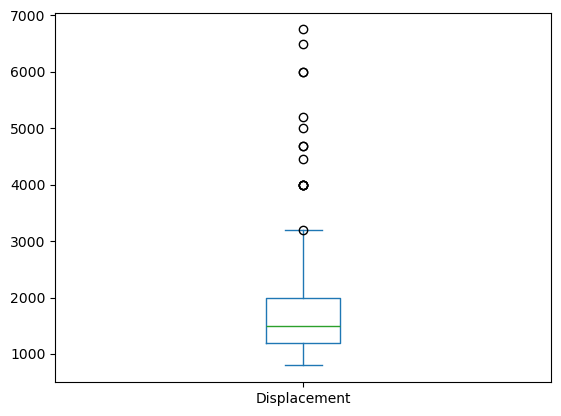

In [33]:
num_df1[['Displacement']].plot.box()
plt.show()

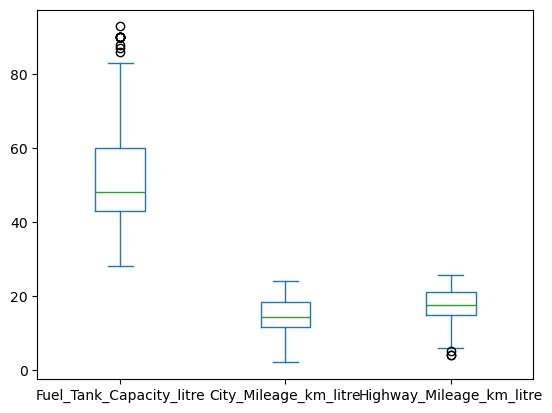

In [34]:
num_df1[['Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre']].plot.box()
plt.show()

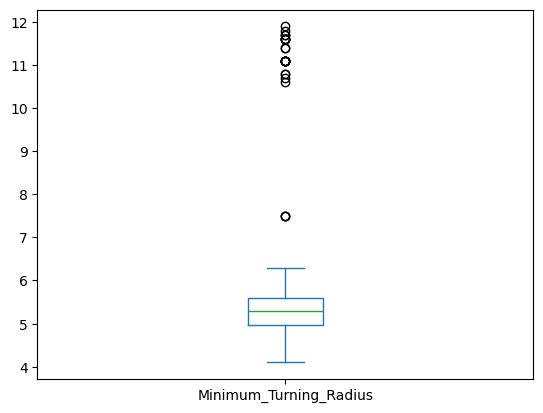

In [35]:
num_df1[['Minimum_Turning_Radius']].plot.box()
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


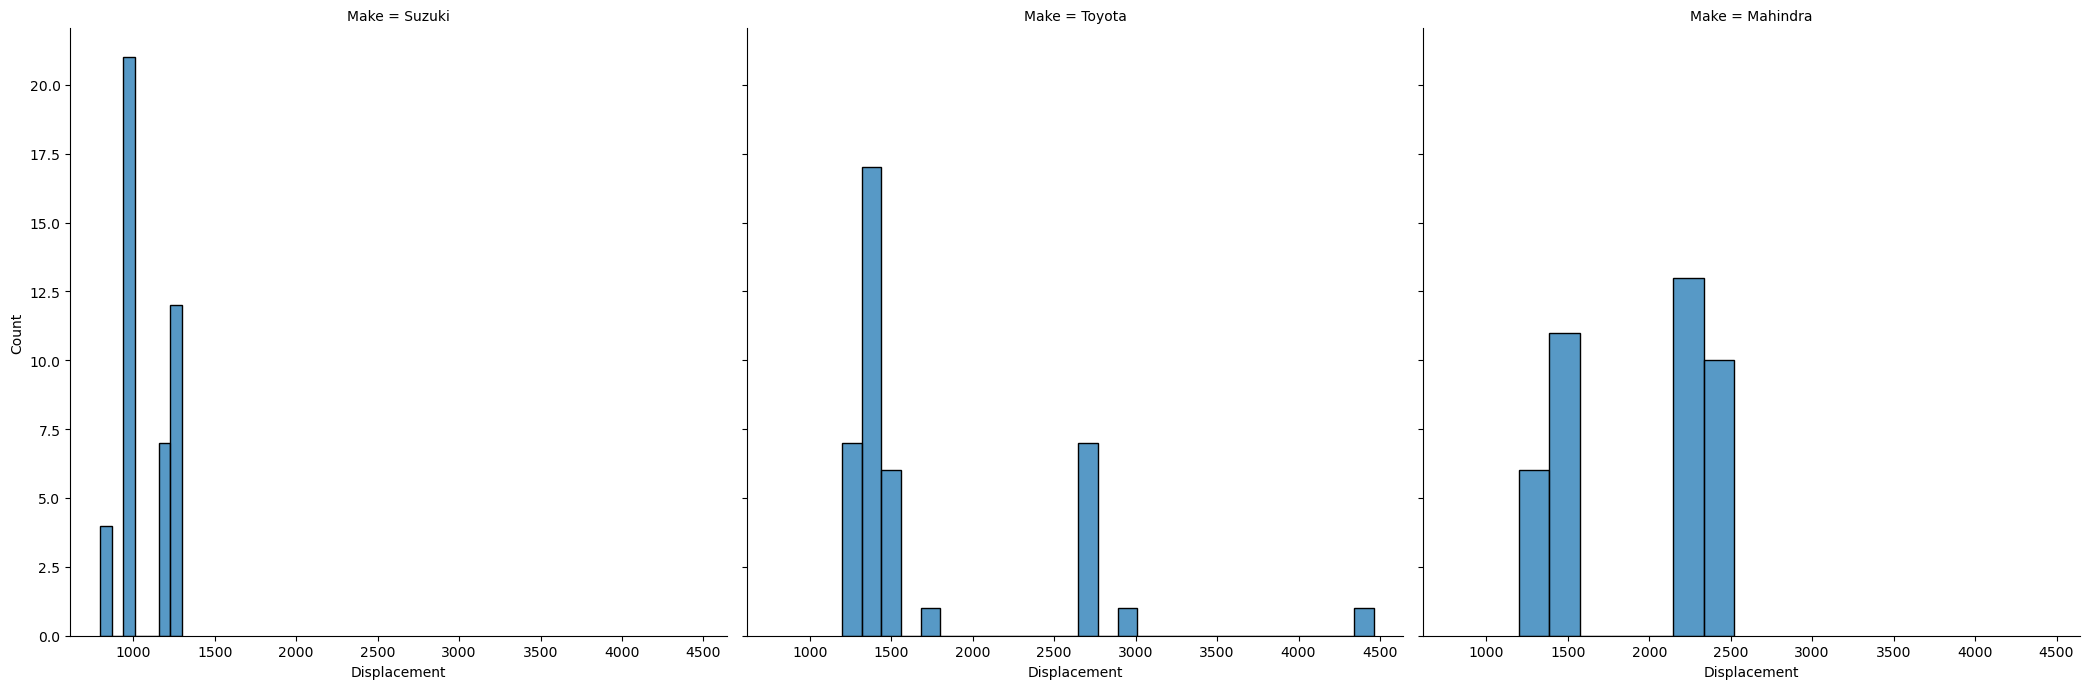

In [36]:
data = df2[(df2['Make'] == 'Suzuki') | (df2['Make'] == 'Toyota') | (df2['Make'] == 'Mahindra')]
g = sb.FacetGrid(data,col = 'Make', height = 7)
g.map(sb.histplot, "Displacement")
plt.show()

In [37]:
gnd=df2.groupby('Make')
suzuki=gnd.get_group('Suzuki')
toyota=gnd.get_group('Toyota')
mahindra=gnd.get_group('Mahindra')

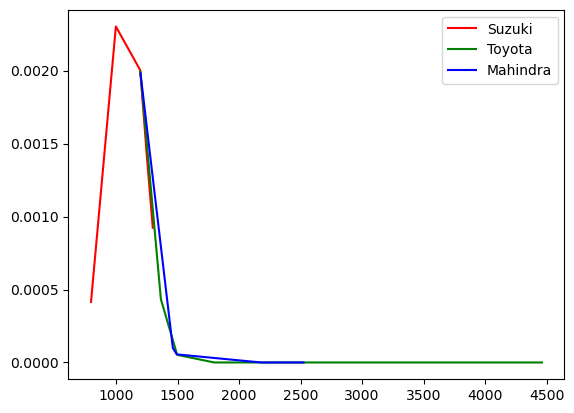

In [38]:
suzuki_data=sorted(suzuki['Displacement'])
toyota_data=sorted(toyota['Displacement'])
mahindra_data=sorted(mahindra['Displacement'])

s_mean=st.mean(suzuki_data)
s_std=st.stdev(suzuki_data)

t_mean=st.mean(toyota_data)
t_std=st.stdev(toyota_data)

m_mean=st.mean(mahindra_data)
m_std=st.stdev(mahindra_data)

plt.plot(suzuki_data,norm.pdf(suzuki_data,s_mean,s_std),color='red',label='Suzuki')
plt.plot(toyota_data,norm.pdf(toyota_data,s_mean,s_std),color='green',label='Toyota')
plt.plot(mahindra_data,norm.pdf(mahindra_data,s_mean,s_std),color='blue',label='Mahindra')

plt.legend()
plt.show()

In [39]:
print('Kurtosis of Suzuki is',kurtosis(suzuki_data))
print('Kurtosis of Toyota is',kurtosis(toyota_data))
print('Kurtosis of Mahindra is',kurtosis(mahindra_data))

Kurtosis of Suzuki is -0.9451911538202036
Kurtosis of Toyota is 3.225985404229929
Kurtosis of Mahindra is -1.5644869415572917


## Analysis
##### From My Analysis Displacement and Minimum Turning Radius has more number of Outliers
##### Fuel Tank Capacity and Highway Mileage KM litre has less Outliers
##### And City Mileage KM litre has No Outliers

##### In Displacement Toyota has large number of Displacement of 1300 to 3000
##### Whereas Mahindra has 1300 to 2500 and Suzuki has 500 to 1300

##### Kurtosis Variation
##### Toyota Displacement is Leptokurtic
##### Suzuki and Mahindra Displacement are Platykurtic

In [40]:
#2
dataset=df2[['Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Minimum_Turning_Radius']]
dataset

,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Minimum_Turning_Radius
6,799.0,28.0,21.38,24.00,4.7
7,799.0,28.0,21.38,24.00,4.7
8,799.0,28.0,21.38,24.00,4.7
9,799.0,28.0,21.38,24.00,4.7
24,1196.0,40.0,12.00,15.00,4.5
...,...,...,...,...,...
1271,1498.0,40.0,22.60,25.10,5.3
1272,1498.0,40.0,22.60,25.10,5.3
1273,1497.0,40.0,18.00,18.00,5.3
1274,1497.0,40.0,14.30,16.40,5.3


In [41]:
dataset['Car_Mileage_km_litre']=(dataset['City_Mileage_km_litre'] + dataset['Highway_Mileage_km_litre'])/2
dataset

C:\Users\USER\AppData\Local\Temp\ipykernel_9128\2258247090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Car_Mileage_km_litre']=(dataset['City_Mileage_km_litre'] + dataset['Highway_Mileage_km_litre'])/2


,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Minimum_Turning_Radius,Car_Mileage_km_litre
6,799.0,28.0,21.38,24.00,4.7,22.690
7,799.0,28.0,21.38,24.00,4.7,22.690
8,799.0,28.0,21.38,24.00,4.7,22.690
9,799.0,28.0,21.38,24.00,4.7,22.690
24,1196.0,40.0,12.00,15.00,4.5,13.500
...,...,...,...,...,...,...
1271,1498.0,40.0,22.60,25.10,5.3,23.850
1272,1498.0,40.0,22.60,25.10,5.3,23.850
1273,1497.0,40.0,18.00,18.00,5.3,18.000
1274,1497.0,40.0,14.30,16.40,5.3,15.350


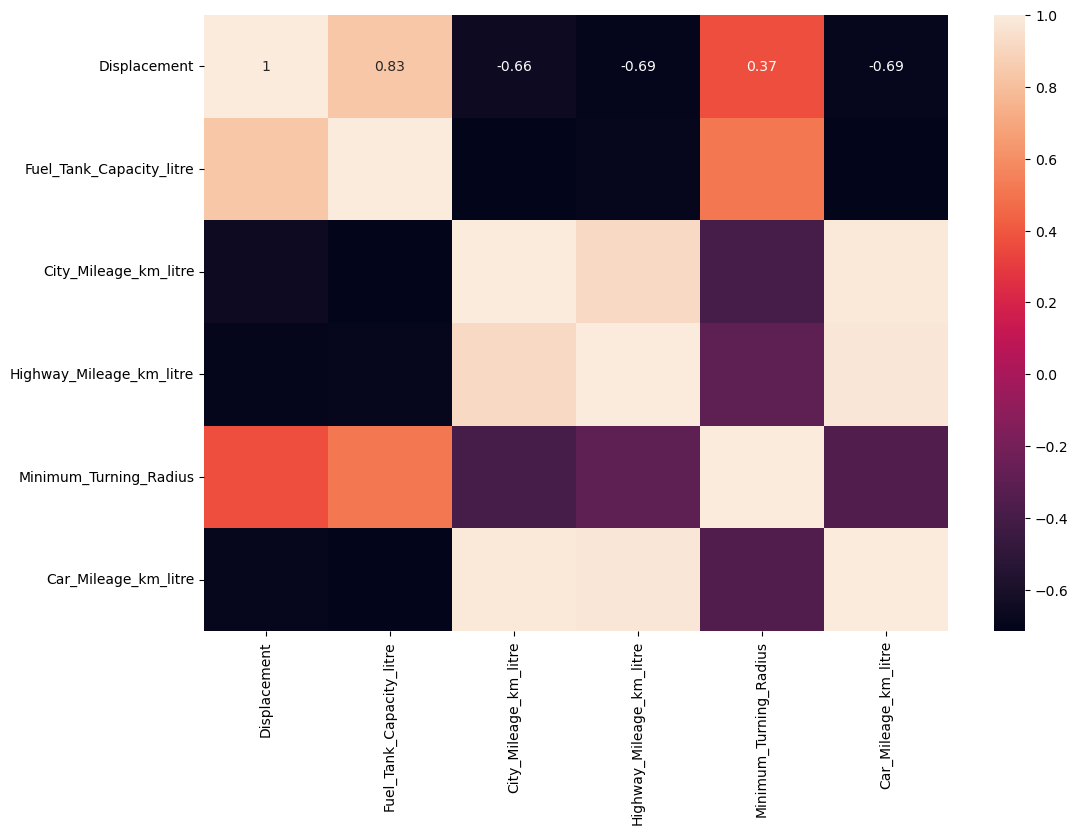

In [42]:
plt.figure(figsize=(12,8))
sb.heatmap(dataset.corr(),annot=True)
plt.show()

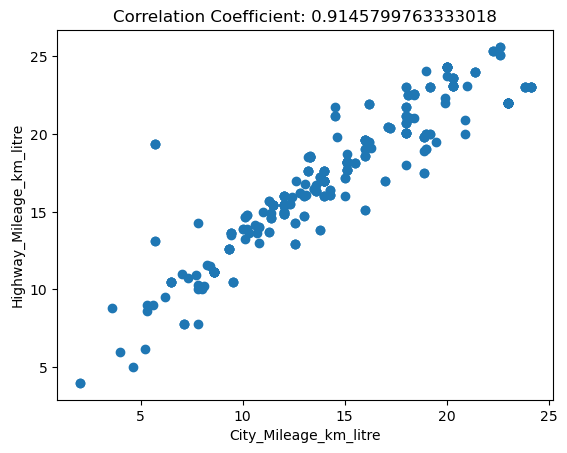

In [43]:
c_v=dataset['City_Mileage_km_litre'].corr(dataset['Highway_Mileage_km_litre'])
plt.scatter(dataset['City_Mileage_km_litre'],dataset['Highway_Mileage_km_litre'])
plt.xlabel('City_Mileage_km_litre')
plt.ylabel('Highway_Mileage_km_litre')
plt.title('Correlation Coefficient: '+str(c_v))
plt.show()

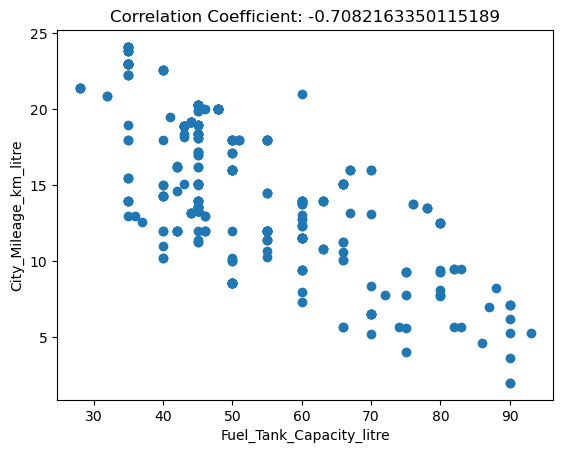

In [44]:
c_v=dataset['Fuel_Tank_Capacity_litre'].corr(dataset['City_Mileage_km_litre'])
plt.scatter(dataset['Fuel_Tank_Capacity_litre'],dataset['City_Mileage_km_litre'])
plt.xlabel('Fuel_Tank_Capacity_litre')
plt.ylabel('City_Mileage_km_litre')
plt.title('Correlation Coefficient: '+str(c_v))
plt.show()

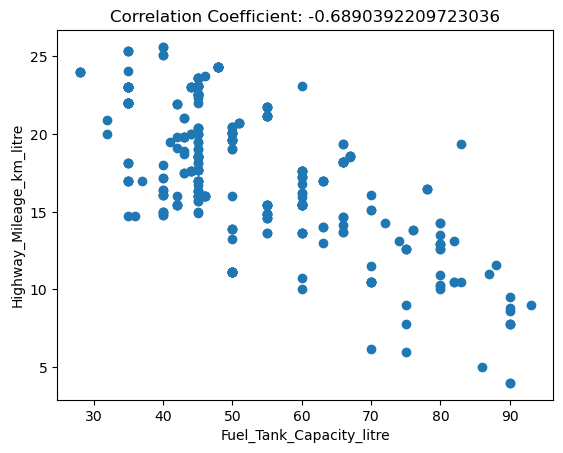

In [45]:
c_v=dataset['Fuel_Tank_Capacity_litre'].corr(dataset['Highway_Mileage_km_litre'])
plt.scatter(dataset['Fuel_Tank_Capacity_litre'],dataset['Highway_Mileage_km_litre'])
plt.xlabel('Fuel_Tank_Capacity_litre')
plt.ylabel('Highway_Mileage_km_litre')
plt.title('Correlation Coefficient: '+str(c_v))
plt.show()

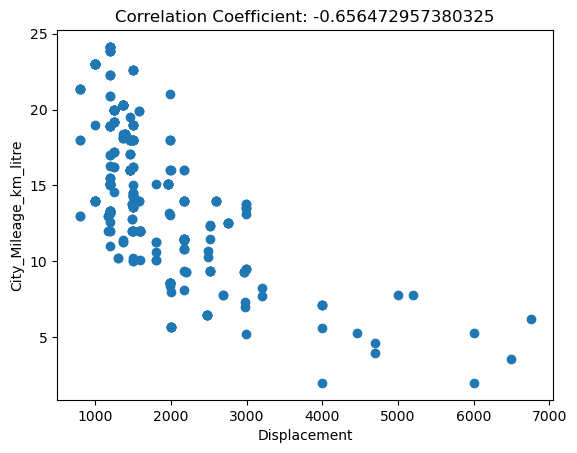

In [46]:
c_v=dataset['Displacement'].corr(dataset['City_Mileage_km_litre'])
plt.scatter(dataset['Displacement'],dataset['City_Mileage_km_litre'])
plt.xlabel('Displacement')
plt.ylabel('City_Mileage_km_litre')
plt.title('Correlation Coefficient: '+str(c_v))
plt.show()

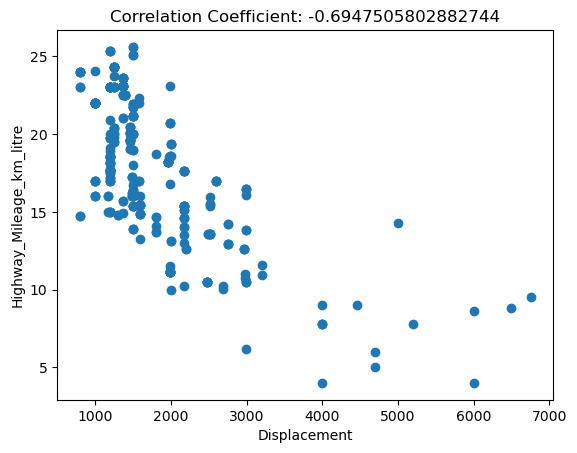

In [47]:
c_v=dataset['Displacement'].corr(dataset['Highway_Mileage_km_litre'])
plt.scatter(dataset['Displacement'],dataset['Highway_Mileage_km_litre'])
plt.xlabel('Displacement')
plt.ylabel('Highway_Mileage_km_litre')
plt.title('Correlation Coefficient: '+str(c_v))
plt.show()

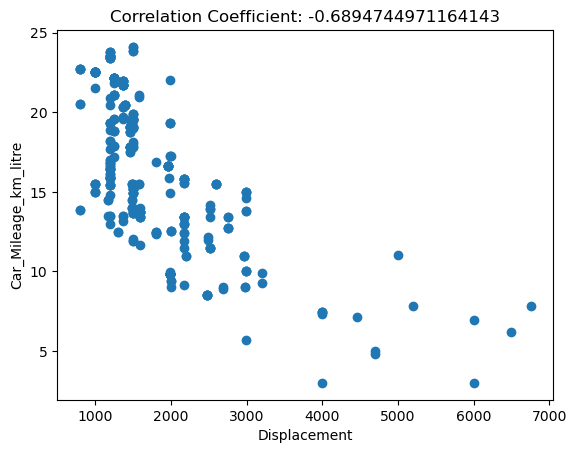

In [48]:
c_v=dataset['Displacement'].corr(dataset['Car_Mileage_km_litre'])
plt.scatter(dataset['Displacement'],dataset['Car_Mileage_km_litre'])
plt.xlabel('Displacement')
plt.ylabel('Car_Mileage_km_litre')
plt.title('Correlation Coefficient: '+str(c_v))
plt.show()